# 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Importing and visualizing data

### 2.1 Original features

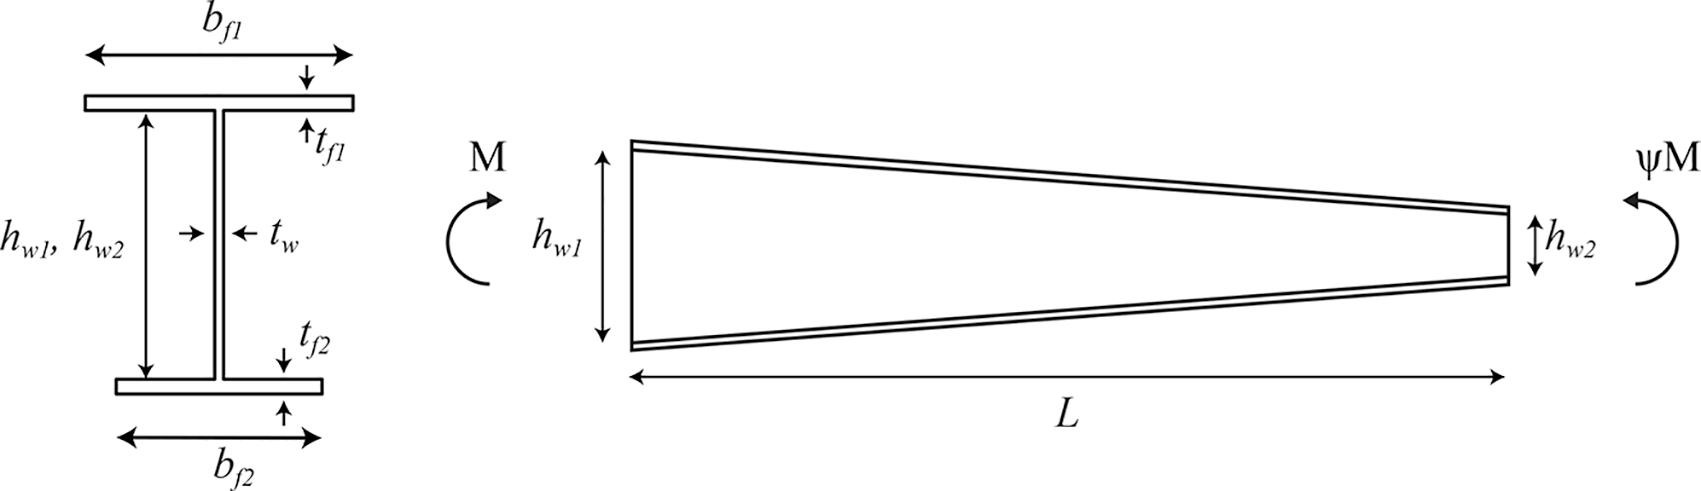

In [2]:
from IPython import display
display.Image("1-s2.0-S2352012422004581-gr4_lrg.jpg")

In [3]:
df = pd.read_csv("training_set.csv", sep=';')
df.head()

,hw1,hw2,tw,bf1,tf1,bf2,tf2,psi,L,y
0,500,167,2.09,500,17.89,375,13.42,-0.75,19000,1703.681777
1,700,280,4.75,525,34.26,700,40.53,-0.75,28000,6745.446061
2,400,400,1.67,100,6.89,300,18.47,0.75,8000,143.526934
3,160,400,3.43,200,9.37,100,6.89,-0.25,7200,145.486862
4,100,400,1.33,300,15.16,300,4.11,1.00,5600,643.674997


In [4]:
df.info()

# All the variables are floats or integers.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60549 entries, 0 to 60548
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hw1     60549 non-null  int64  
 1   hw2     60549 non-null  int64  
 2   tw      60549 non-null  float64
 3   bf1     60549 non-null  int64  
 4   tf1     60549 non-null  float64
 5   bf2     60549 non-null  int64  
 6   tf2     60549 non-null  float64
 7   psi     60549 non-null  float64
 8   L       60549 non-null  int64  
 9   y       60549 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 4.6 MB


In [5]:
df.describe()

,hw1,hw2,tw,bf1,tf1,bf2,tf2,psi,L,y
count,60549.000000,60549.000000,60549.000000,60549.000000,60549.000000,60549.000000,60549.000000,60549.000000,60549.000000,60549.000000
mean,536.317809,437.315678,7.257409,384.527820,19.023638,393.461907,19.060153,0.022969,14916.890452,6213.193798
std,268.527574,265.360820,8.032689,236.838237,14.176724,239.568008,14.145259,0.639762,9020.650939,18492.627003
min,75.000000,75.000000,1.000000,75.000000,1.000000,75.000000,1.000000,-1.000000,600.000000,0.202016
25%,300.000000,225.000000,2.600000,200.000000,8.160000,200.000000,8.210000,-0.500000,8000.000000,241.607111
50%,500.000000,360.000000,4.190000,300.000000,14.920000,350.000000,15.110000,0.000000,13000.000000,1184.808261
75%,800.000000,600.000000,8.130000,525.000000,26.640000,525.000000,26.640000,0.500000,20800.000000,4845.989135
max,1000.000000,1000.000000,40.000000,1000.000000,80.000000,1000.000000,80.000000,1.000000,40000.000000,806819.125200


In [6]:
df.isnull().sum()

# there are no NaN values

hw1    0
hw2    0
tw     0
bf1    0
tf1    0
bf2    0
tf2    0
psi    0
L      0
y      0
dtype: int64

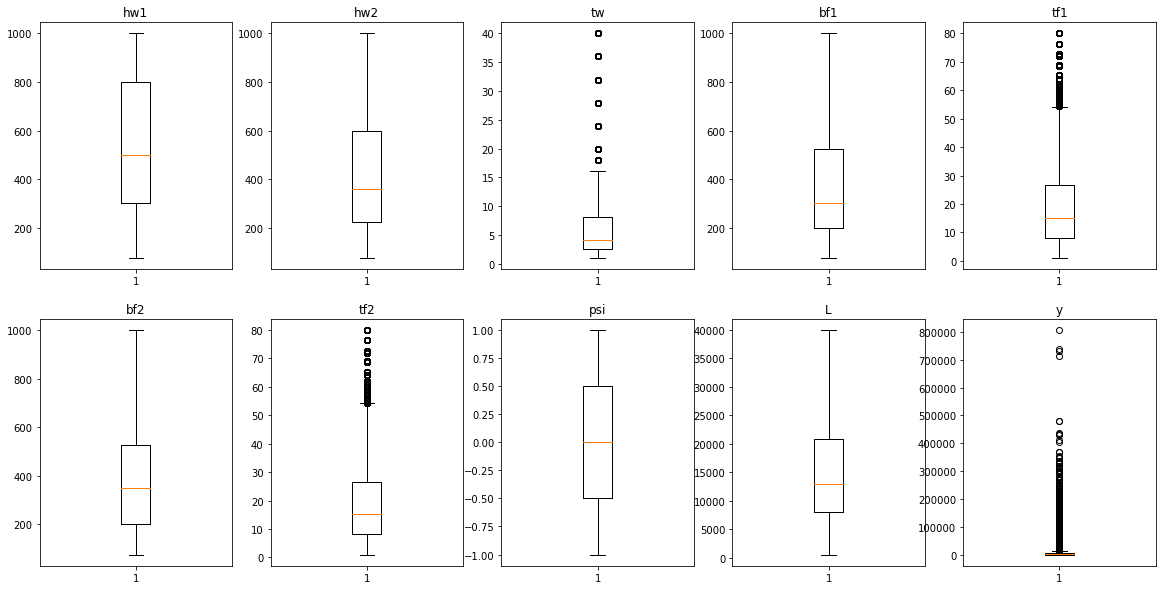

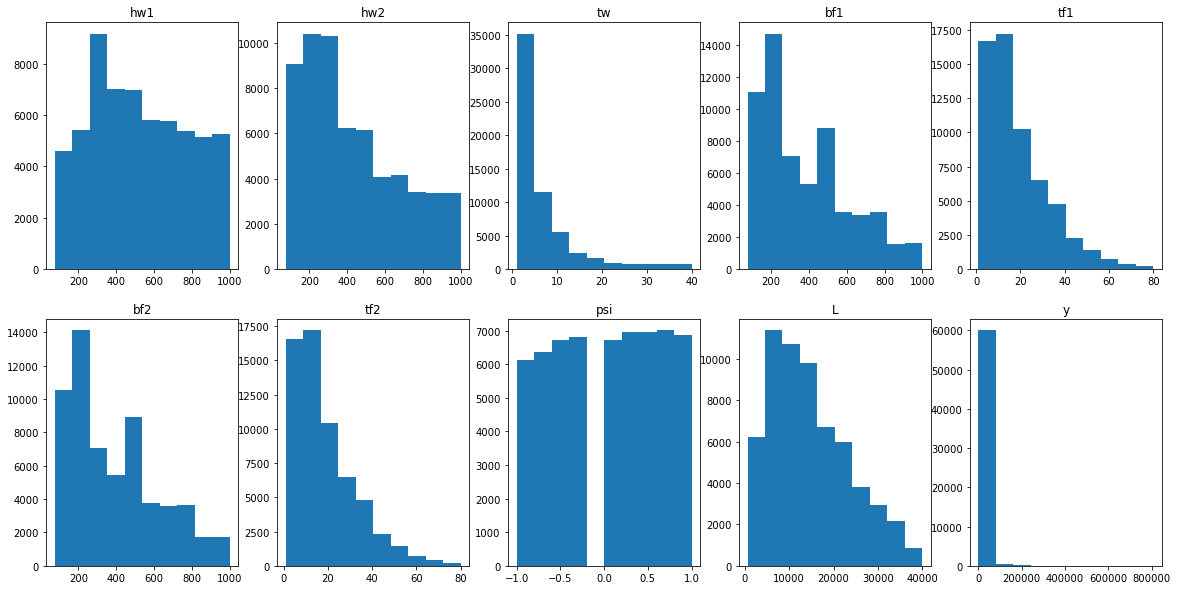

In [7]:
# Boxplots
plt.figure(figsize=(20,10))
for i in range(len(df.columns)):
    plt.subplot(2,5,i+1)
    plt.boxplot(df.iloc[:,i])
    plt.title(df.columns[i])

# Histograms
plt.figure(figsize=(20,10))
for i in range(len(df.columns)):
    plt.subplot(2,5,i+1)
    plt.hist(df.iloc[:,i])
    plt.title(df.columns[i])

### 2.2 Generated features

</br>Taper ratio
- $h_{w, max}/h_{w, min}$

</br>Flange width ratio
- $b_{f1}/b_{f2}$

</br>Height to width ratio
- $h_{w, max}/b_{f, max}$

</br>Beam length
- $L/h_{w, max}$

</br>Plate thickness ratio
- $t_{f1}/t_{w}; t_{f2}/t_{w}$

</br>Flange slenderness
- $b_{f1}/t_{f1}; b_{f2}/t_{fs}$

</br>Web slenderness
- $h_{w, max}/t_{w}$;

In [8]:
def df_extend(df):
    """
    this function creates new variables useful for the model
    these new variables are explained in the original paper
    """
    df_extended = df.copy()

    # creating new features
    df_extended["taper_ratio"] = df[["hw1","hw2"]].max(axis=1) / df[["hw1","hw2"]].min(axis=1)
    df_extended["flange_width_ratio"] = df.bf1 / df.bf2
    df_extended["height_to_width_ratio"] = df[["hw1","hw2"]].max(axis=1) / df[["bf1","bf2"]].max(axis=1)
    df_extended["beam_length"] = df.L / df[["hw1","hw2"]].max(axis=1)
    df_extended["plate_thickness_ratio_1"] = df.tf1 / df.tw
    df_extended["plate_thickness_ratio_2"] = df.tf2 / df.tw
    df_extended["flange_slenderness_1"] = df.bf1 / df.tf1
    df_extended["flange_slenderness_2"] = df.bf2 / df.tf2
    df_extended["web_slenderness"] = df[["hw1", "hw2"]].max(axis=1) / df.tw

    # change y position
    y_aux = df_extended.y
    df_extended = df_extended.drop(columns="y")
    df_extended["y"] = y_aux

    return df_extended

df_extended = df_extend(df)

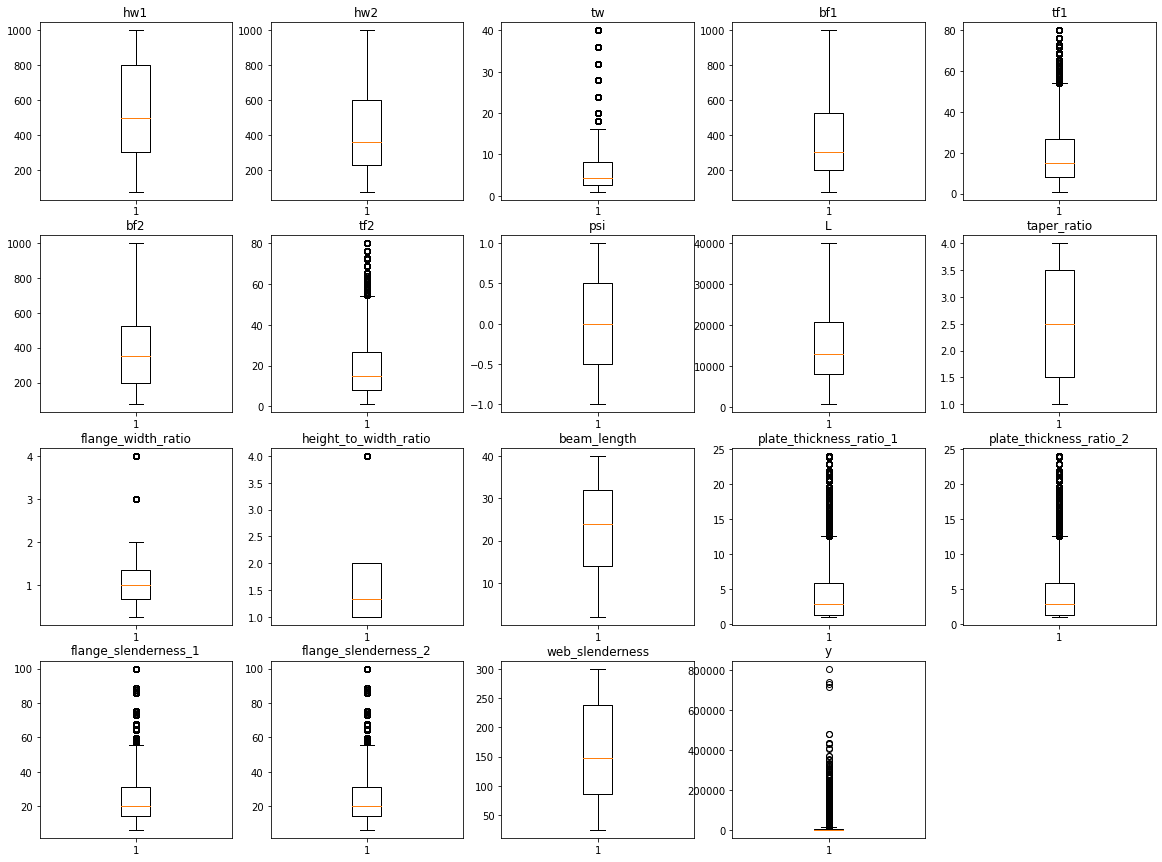

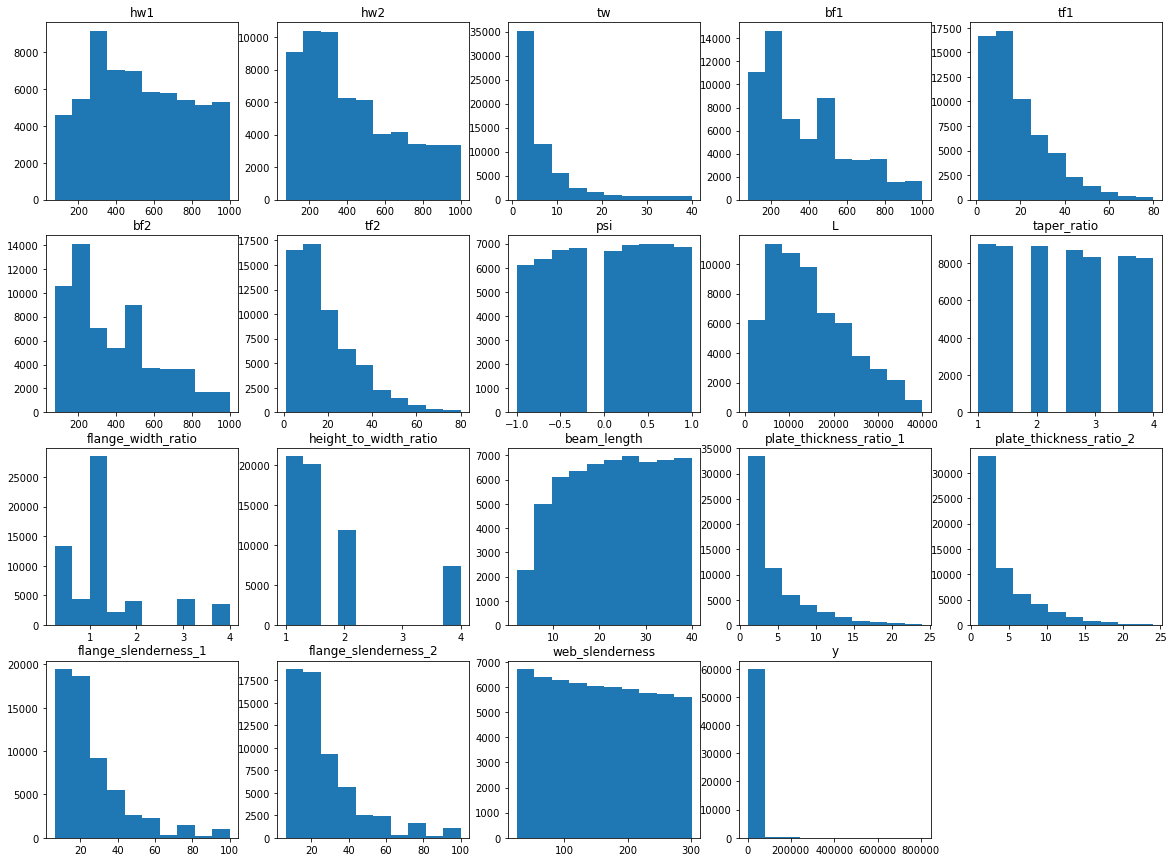

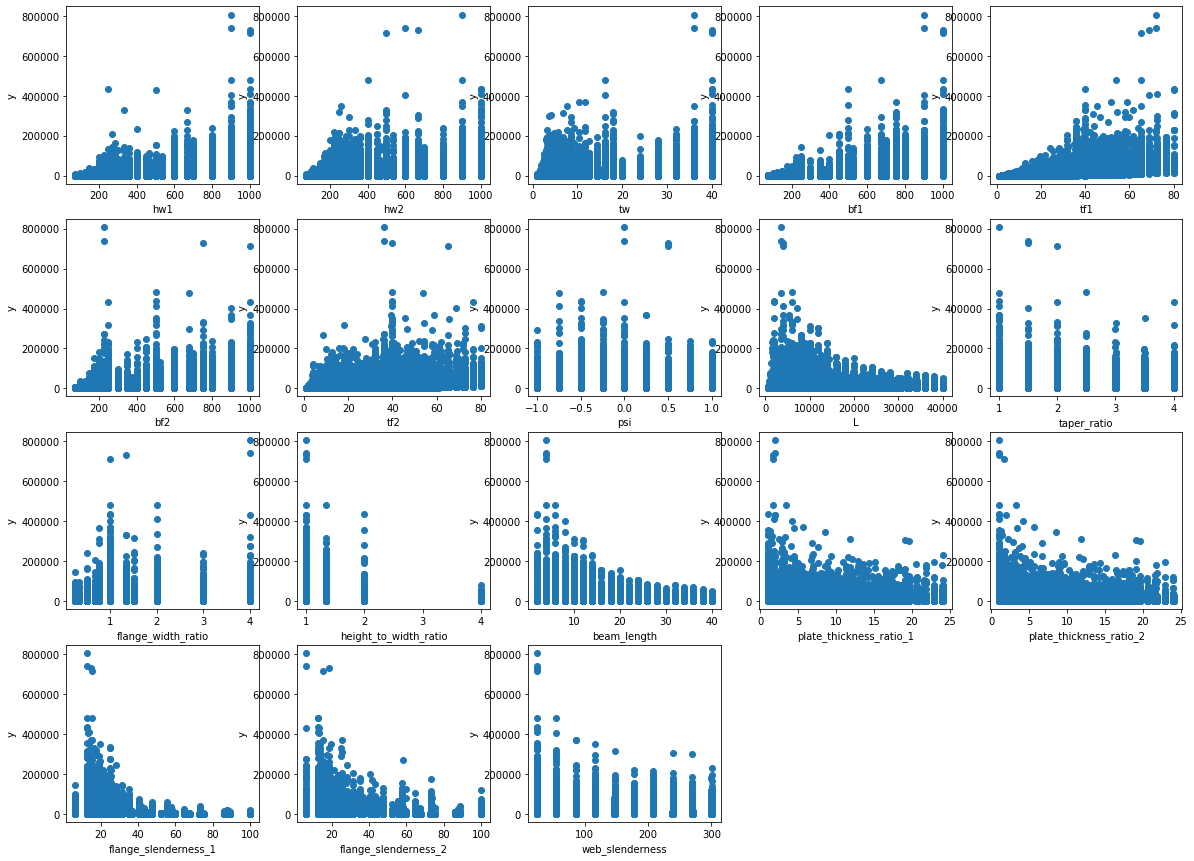

In [9]:
# Boxplots
plt.figure(figsize=(20,15))
for i in range(len(df_extended.columns)):
    plt.subplot(4,5,i+1)
    plt.boxplot(df_extended.iloc[:,i])
    plt.title(df_extended.columns[i])

# Histograms
plt.figure(figsize=(20,15))
for i in range(len(df_extended.columns)):
    plt.subplot(4,5,i+1)
    plt.hist(df_extended.iloc[:,i])
    plt.title(df_extended.columns[i])

plt.figure(figsize=(20,15))
for i in range(len(df_extended.columns) - 1):
    plt.subplot(4,5,i+1)
    plt.scatter(df_extended.iloc[:,i], df_extended.y)
    plt.xlabel(df_extended.columns[i])
    plt.ylabel("y")

# 3. Linear regression

This code was taken from the second class of Fundamentals of Machine Learning.

### 3.1 Feature normalization function

In [10]:
def featureNormalization(X):
    """
    Take in numpy array of X values and return normalize X values,
    the mean and standard deviation of each feature
    """
    #Compute the mean value 
    mean = np.mean(X, axis=0); 
    mean = mean.reshape(X.shape[1], 1)
    mean = mean.transpose()
    
    # compute the standard deviation
    std = np.std(X, axis=0)
    std = std.reshape(X.shape[1], 1)
    std = std.transpose()
    
    # apply Mean normalization
    X_norm = (X-mean)/std
    
    return X_norm , mean , std

### 3.2 Cost function

In [11]:
def computeCost(X,y,theta):
    """
    Take the arrays X, y, theta and return cost function J for this theta. 
    """
    # number of training examples
    m= X.shape[0]
    
    # Use the vectorized dot product with function np.dot() to compute the linear regression model
    h= np.dot(X,theta)
    
    #Implement the formula above to compute cost function. 
    #Use function np.sum() to compute the sum of errors over all examples. 
    J= 1/(2*m)*np.sum((h-y)**2)
        
    return J

### 3.3 Gradient descent of the cost function function

In [12]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
    Take arrays X, y and theta and update theta over num_iters steps 
    with learning rate alpha
    Return: final vector theta and the values of the cost function 
    for each iteration (J_history) 
    """
    
    m = X.shape[0]
    J_history = []
    
    for i in range(num_iters):
        
        #compute the linear regression model
        h = np.dot(X, theta)
        
        #Vectorized way to compute all gradients simultaneously 
        grad = np.dot(X.transpose(), (h-y)) / m 
        
        # updates of vector theta for each iteration
        theta = theta - alpha*grad
        
        J_history.append(computeCost(X, y, theta))
    
    return theta, J_history

### 3.4 Prediction function

In [13]:
def predict(x, theta):
    """
    Takes array of x and theta and return the predicted value of y 
    """
     #compute the linear regression model
    x = np.array([1,x/10000])
    h = np.dot(x,theta)
    
    return h

### 3.5 Implementing the steps above described

First steps

In [14]:
X = df_extended.drop(columns = "y").values
y = df_extended["y"].values

# number of samples (m) and features (n)
m = X.shape[0]
n = X.shape[1] + 1

# reshaping y
y = y.reshape(m, 1)

# normalization
X_norm, mean, std = featureNormalization(X)
X_norm = np.append(np.ones((m,1)), X_norm, axis = 1)


Initial cost

In [15]:
# initializing theta vector
theta = np.zeros((n, 1))

Cost = computeCost(X_norm, y, theta)
print("Initial cost", Cost)

Initial cost 190287691.34377155


Gradient descent

In [16]:
initial_theta = np.zeros((n, 1))
alpha = [0.001, 0.01, 0.1, 0.3]
theta_J = dict()
num_iters = 500

for i in range(len(alpha)):
    theta, J_history = gradientDescent(X_norm, y, initial_theta, alpha[i], num_iters)
    var = {}
    var[0] = theta
    var[1] = J_history
    theta_J[i] = var

Lowest cost: 99685423.79837178


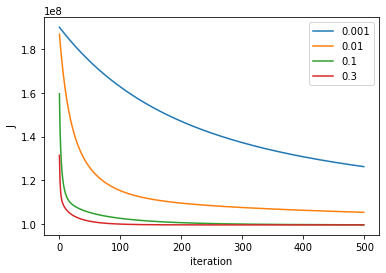

In [17]:
plt.figure()
for i in range(len(alpha)):
    plt.plot(theta_J[i][1])
plt.legend(alpha)
plt.xlabel("iteration")
plt.ylabel("J")

print("Lowest cost:", theta_J[3][1][-1])

As we can see, it is not enough to implement a simple linear regression model, since the lowest cost possible is of order $10^8$. Therefore, this enphasizes the need to use a more complex model for prediction.

# 4. Polynomial features and feature selection

Creating polynomial features

In [18]:
def poly(df, degree = 2):
    """
    this function takes the original dataframe and creates an X dataframe, 
    adding the squared features from the original ones
    """
    if degree < 2:
        print("ERROR: type a degree that is an integer equal or greater than 2")

    X_poly = df.drop(columns="y").copy()

    for i in range(2, degree + 1):
        for feature in df.drop(columns="y"):
            X_poly[str(i)+"_"+feature] = df[feature] ** (i)

    return X_poly

Implementing the model with feature selection (function SelectKBest) and with polynomial features

c:\Users\Miguel Silva\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Miguel Silva\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


Initial cost 190287691.34377155
Lowest cost: 95805850.43082403


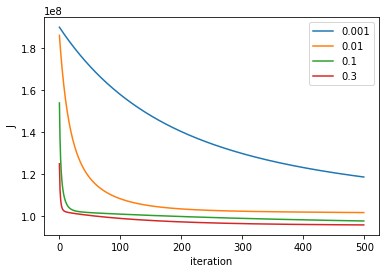

In [19]:
from sklearn.feature_selection import SelectKBest

# reshaping y
y = df.y.values
y = y.reshape(m, 1)

# feature selection
selector = SelectKBest(k = 30)
X_poly = poly(df = df_extended, degree = 4).values
X_select = selector.fit_transform(X_poly, y)

# number of samples (m) and features (n)
m = X_select.shape[0]
n = X_select.shape[1] + 1   # +1 to considering an extra columns of ones

# normalization
X_norm, mean, std = featureNormalization(X_select)

# adding column of ones in the beginning
X_norm = np.append(np.ones((m, 1)), X_norm, axis = 1)

# initializing theta vector
theta = np.zeros((n, 1))

# cost function
Cost = computeCost(X_norm, y, theta)
print("Initial cost", Cost)

# initalizing paramenters for model fitting
initial_theta = np.zeros((n, 1))
alpha = [0.001, 0.01, 0.1, 0.3]
theta_J = dict()
num_iters = 500

# cost function evolution
for i in range(len(alpha)):
    theta, J_history = gradientDescent(X_norm, y, initial_theta, alpha[i], num_iters)
    var = {}
    var[0] = theta
    var[1] = J_history
    theta_J[i] = var

# visualizing the evolution of the cost function
plt.figure()
for i in range(len(alpha)):
    plt.plot(theta_J[i][1])
plt.legend(alpha)
plt.xlabel("iteration")
plt.ylabel("J")

print("Lowest cost:", theta_J[3][1][-1])

Putting the model into a function

In [26]:
def model1(df, n_poly = 4, alpha = 0.3, num_iters = 500):
    """
    this function implements the model
        df:     the dataframe
        n_poly: the degree to create polynomial features~
    """

    from sklearn.feature_selection import SelectKBest

    # target
    m = df.values.shape[0]
    y = df.iloc[:,-1].values
    y = y.reshape(m, 1)

    # feature selection
    X_poly = poly(df = df_extend(df), degree = n_poly).values
    selector = SelectKBest(k = 30)
    X_select = selector.fit_transform(X_poly, y)

    # normalization
    X_norm, mean, std = featureNormalization(X_select)
    normalization = dict()
    normalization["mean"] = mean
    normalization["std"] = std

    # adding column of ones in the beginning
    X_norm = np.append(np.ones((m, 1)), X_norm, axis = 1)

    # initalizing paramenters for model fitting
    initial_theta = np.zeros((n, 1))
    theta_J = dict()

    # cost function evolution
    theta, J_history = gradientDescent(X_norm, y, initial_theta, alpha, num_iters)
    theta_J["parameters"] = theta
    theta_J["cost_function"] = J_history

    # the function returns the model parameters, the 
    return theta_J, normalization, selector

# 5. Model deployment

In [21]:
df_test = pd.read_csv("testing_set.csv", sep=";")

Searching for missing values

In [22]:
df_test.isnull().sum()

# there are no missing values in the training test

hw1    0
hw2    0
tw     0
bf1    0
tf1    0
bf2    0
tf2    0
psi    0
L      0
y      0
dtype: int64

Creating compound features, creating polynomial features, selecting features, and normalization

c:\Users\Miguel Silva\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Miguel Silva\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
c:\Users\Miguel Silva\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SelectKBest was fitted without feature names
  warnings.warn(


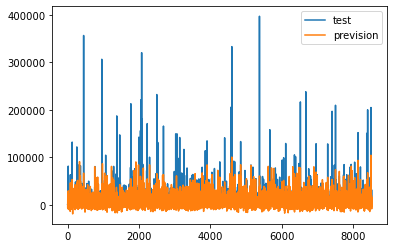

In [42]:
# training the model the model
theta_J, normalization, selector = model1(df, n_poly = 4, alpha = 0.3, num_iters = 500)

# test dataset
y = df_test.iloc[:,-1].values.reshape(len(df_test), 1)
df_test_extended = df_extend(df_test) #compound features

# feature engineering
X_test = poly(df = df_test_extended, degree = 4) #poly features
X_test = selector.transform(X_test) #feature selection
X_test = (X_test - normalization["mean"]) / normalization["std"] #normalization
X_test = np.append(np.ones((len(df_test), 1)), X_test, axis = 1) #adding column of ones

# prediciton
y_predict = X_test @ theta_J["parameters"]

# plotting prediciton
plt.figure()
plt.plot(y)
plt.plot(y_predict)
plt.legend(["test", "prevision"])

In [47]:
from sklearn import metrics

metrics.mean_absolute_percentage_error(y, y_predict)

24.516657569564675